In [1]:
#importing important libraries for performing EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore,boxcox
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import datasets
cali=datasets.fetch_california_housing()
cali

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------

In [3]:
cali.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
print(cali.data,'\n\nshape:',cali.data.shape)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]] 

shape: (20640, 8)


In [5]:
print(cali.target,'\n\nshape:',cali.data.shape)

[4.526 3.585 3.521 ... 0.923 0.847 0.894] 

shape: (20640, 8)


In [6]:
cali.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [7]:
#generating a Panda DataFrame
calif=pd.DataFrame(cali.data,columns=('income','house_age','avg_rooms','avg_bedrooms','popul','avg_occupancy','lat','long'))
calif

,income,house_age,avg_rooms,avg_bedrooms,popul,avg_occupancy,lat,long
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [8]:
calif['house_val']=cali.target

In [9]:
calif

,income,house_age,avg_rooms,avg_bedrooms,popul,avg_occupancy,lat,long,house_val
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [10]:
calif.shape

(20640, 9)

In [11]:
calif.dtypes

income           float64
house_age        float64
avg_rooms        float64
avg_bedrooms     float64
popul            float64
avg_occupancy    float64
lat              float64
long             float64
house_val        float64
dtype: object

In [12]:
calif.columns.values

array(['income', 'house_age', 'avg_rooms', 'avg_bedrooms', 'popul',
       'avg_occupancy', 'lat', 'long', 'house_val'], dtype=object)

In [13]:
calif.head(6)

,income,house_age,avg_rooms,avg_bedrooms,popul,avg_occupancy,lat,long,house_val
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697


In [14]:
calif.tail(6)

,income,house_age,avg_rooms,avg_bedrooms,popul,avg_occupancy,lat,long,house_val
20634,3.7125,28.0,6.779070,1.148256,1041.0,3.026163,39.27,-121.56,1.168
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [15]:
for i in calif.columns:
    nl=calif[i].isnull().sum()>0
    if nl>0:
        print('Number of null values in, ', i,' =' ,nl)
else:
    print('There is \'NO NULL VALUES\' in this dataset')

There is 'NO NULL VALUES' in this dataset


In [16]:
dups=calif.duplicated(keep='first').sum()
if dups>0:
    Calif=calif.drop_duplicates(keep='first')
    print('There were',dups,'number of duplicated values & they are removed.\n earlier the shape was',calif.shape,
              '\nNow it is',Calif.shape)
else:
    print('There are \'NO DUPLICATED VALUES\' to Drop.')
    


There are 'NO DUPLICATED VALUES' to Drop.


In [17]:
calif.min()

income             0.499900
house_age          1.000000
avg_rooms          0.846154
avg_bedrooms       0.333333
popul              3.000000
avg_occupancy      0.692308
lat               32.540000
long            -124.350000
house_val          0.149990
dtype: float64

In [18]:
calif.max()

income              15.000100
house_age           52.000000
avg_rooms          141.909091
avg_bedrooms        34.066667
popul            35682.000000
avg_occupancy     1243.333333
lat                 41.950000
long              -114.310000
house_val            5.000010
dtype: float64

In [19]:
calif.mean()

income              3.870671
house_age          28.639486
avg_rooms           5.429000
avg_bedrooms        1.096675
popul            1425.476744
avg_occupancy       3.070655
lat                35.631861
long             -119.569704
house_val           2.068558
dtype: float64

In [20]:
calif.median()

income              3.534800
house_age          29.000000
avg_rooms           5.229129
avg_bedrooms        1.048780
popul            1166.000000
avg_occupancy       2.818116
lat                34.260000
long             -118.490000
house_val           1.797000
dtype: float64

In [21]:
calif.std()

income              1.899822
house_age          12.585558
avg_rooms           2.474173
avg_bedrooms        0.473911
popul            1132.462122
avg_occupancy      10.386050
lat                 2.135952
long                2.003532
house_val           1.153956
dtype: float64

In [22]:
calif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
income           20640 non-null float64
house_age        20640 non-null float64
avg_rooms        20640 non-null float64
avg_bedrooms     20640 non-null float64
popul            20640 non-null float64
avg_occupancy    20640 non-null float64
lat              20640 non-null float64
long             20640 non-null float64
house_val        20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


In [23]:
calif.describe()

,income,house_age,avg_rooms,avg_bedrooms,popul,avg_occupancy,lat,long,house_val
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [24]:
#Implementing graphical methods for more exploration

<Figure size 720x480 with 0 Axes>

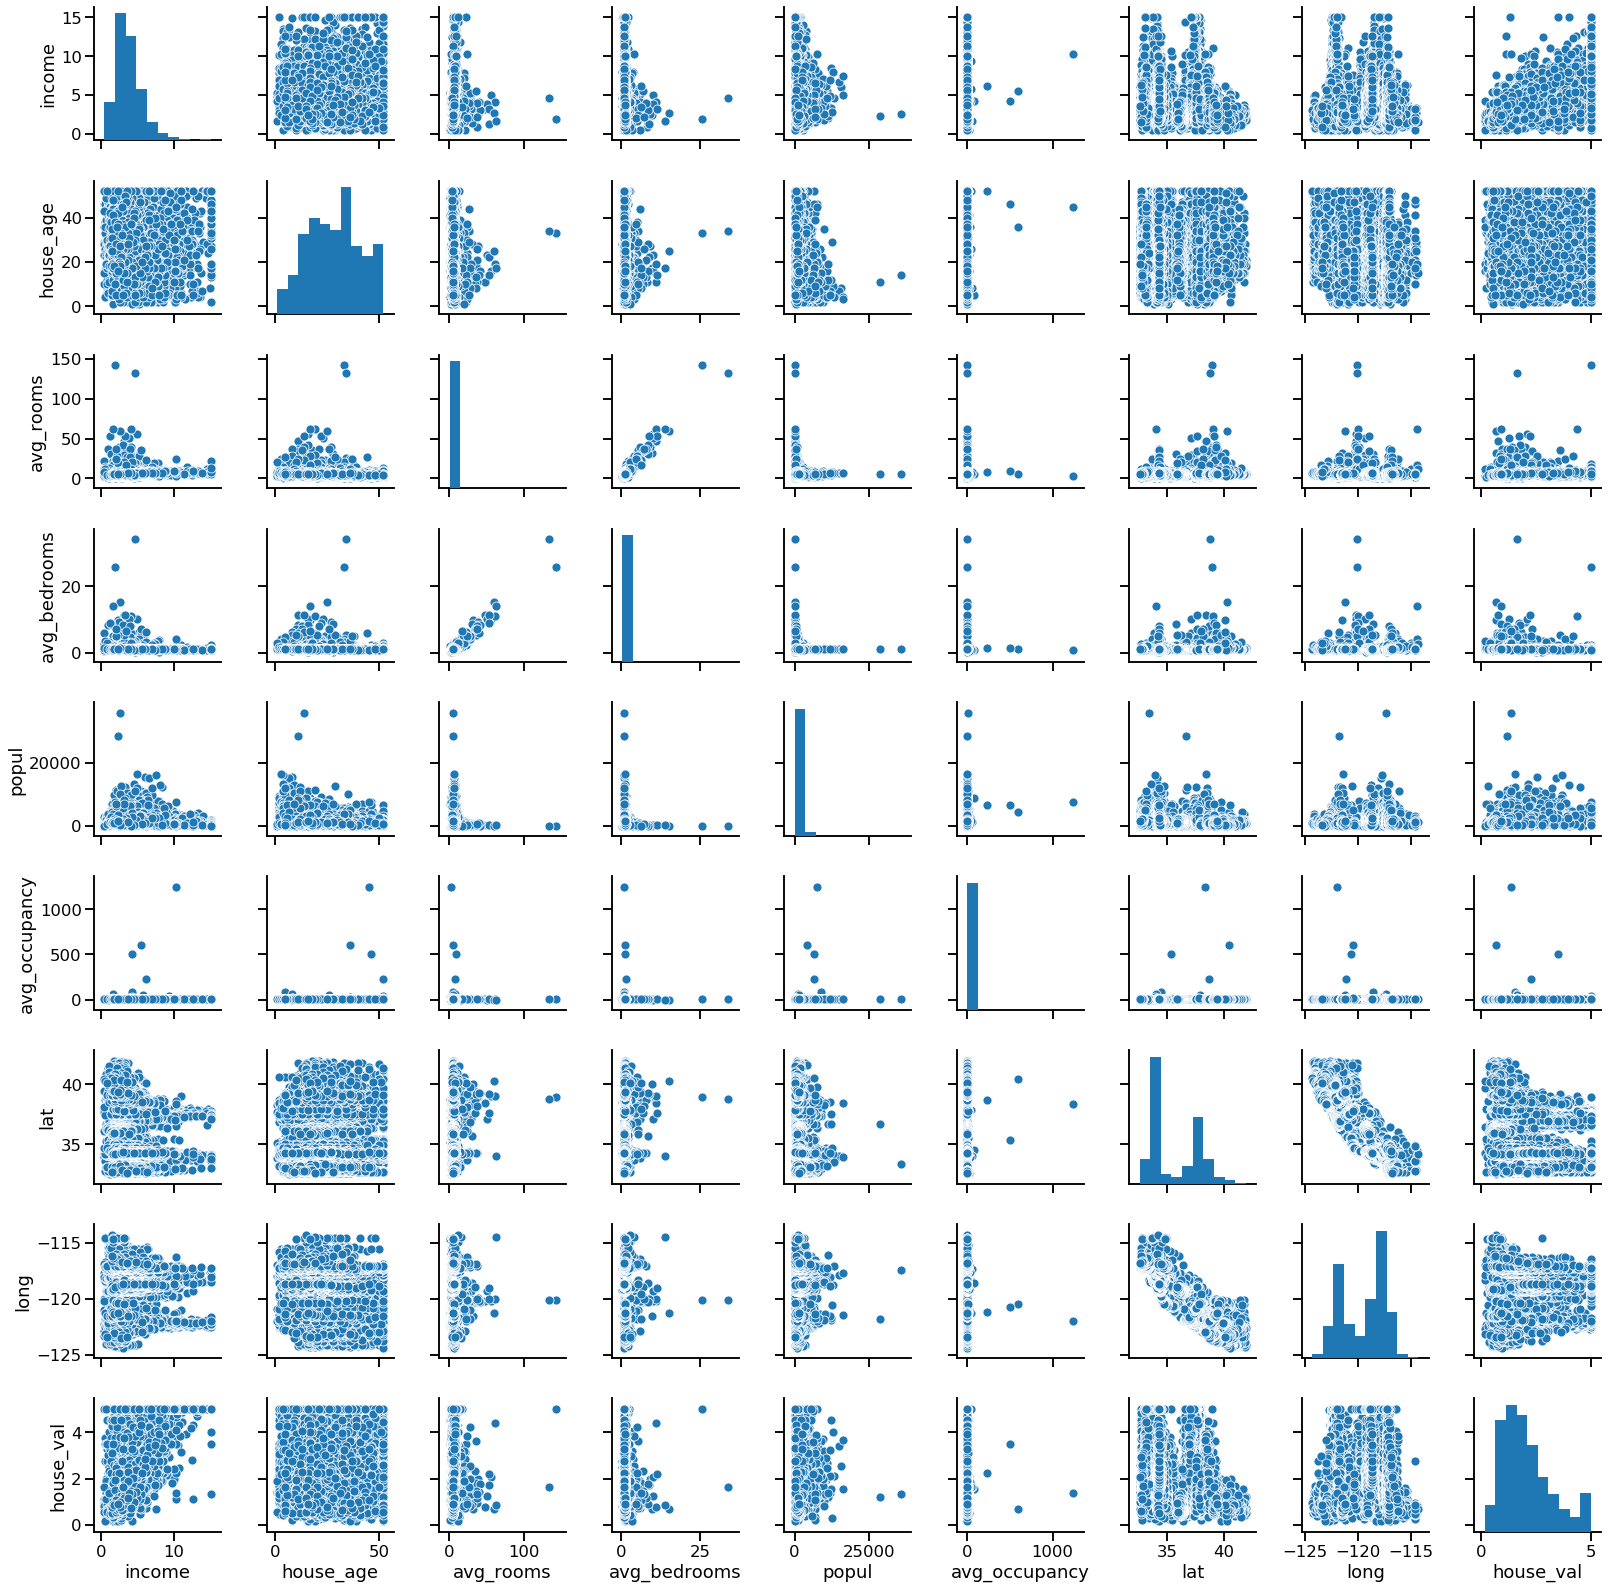

In [25]:
sns.set_context('talk',font_scale=1)
plt.figure(dpi=120)
sns.pairplot(calif)

plt.figure(figsize=(15,5),dpi=100)
sns.set_context('talk',font_scale=0.9)
sns.set(style='whitegrid')
plt.hist(calif,bins=50)
plt.show()

In [26]:
cl=calif.columns.values
cl

array(['income', 'house_age', 'avg_rooms', 'avg_bedrooms', 'popul',
       'avg_occupancy', 'lat', 'long', 'house_val'], dtype=object)

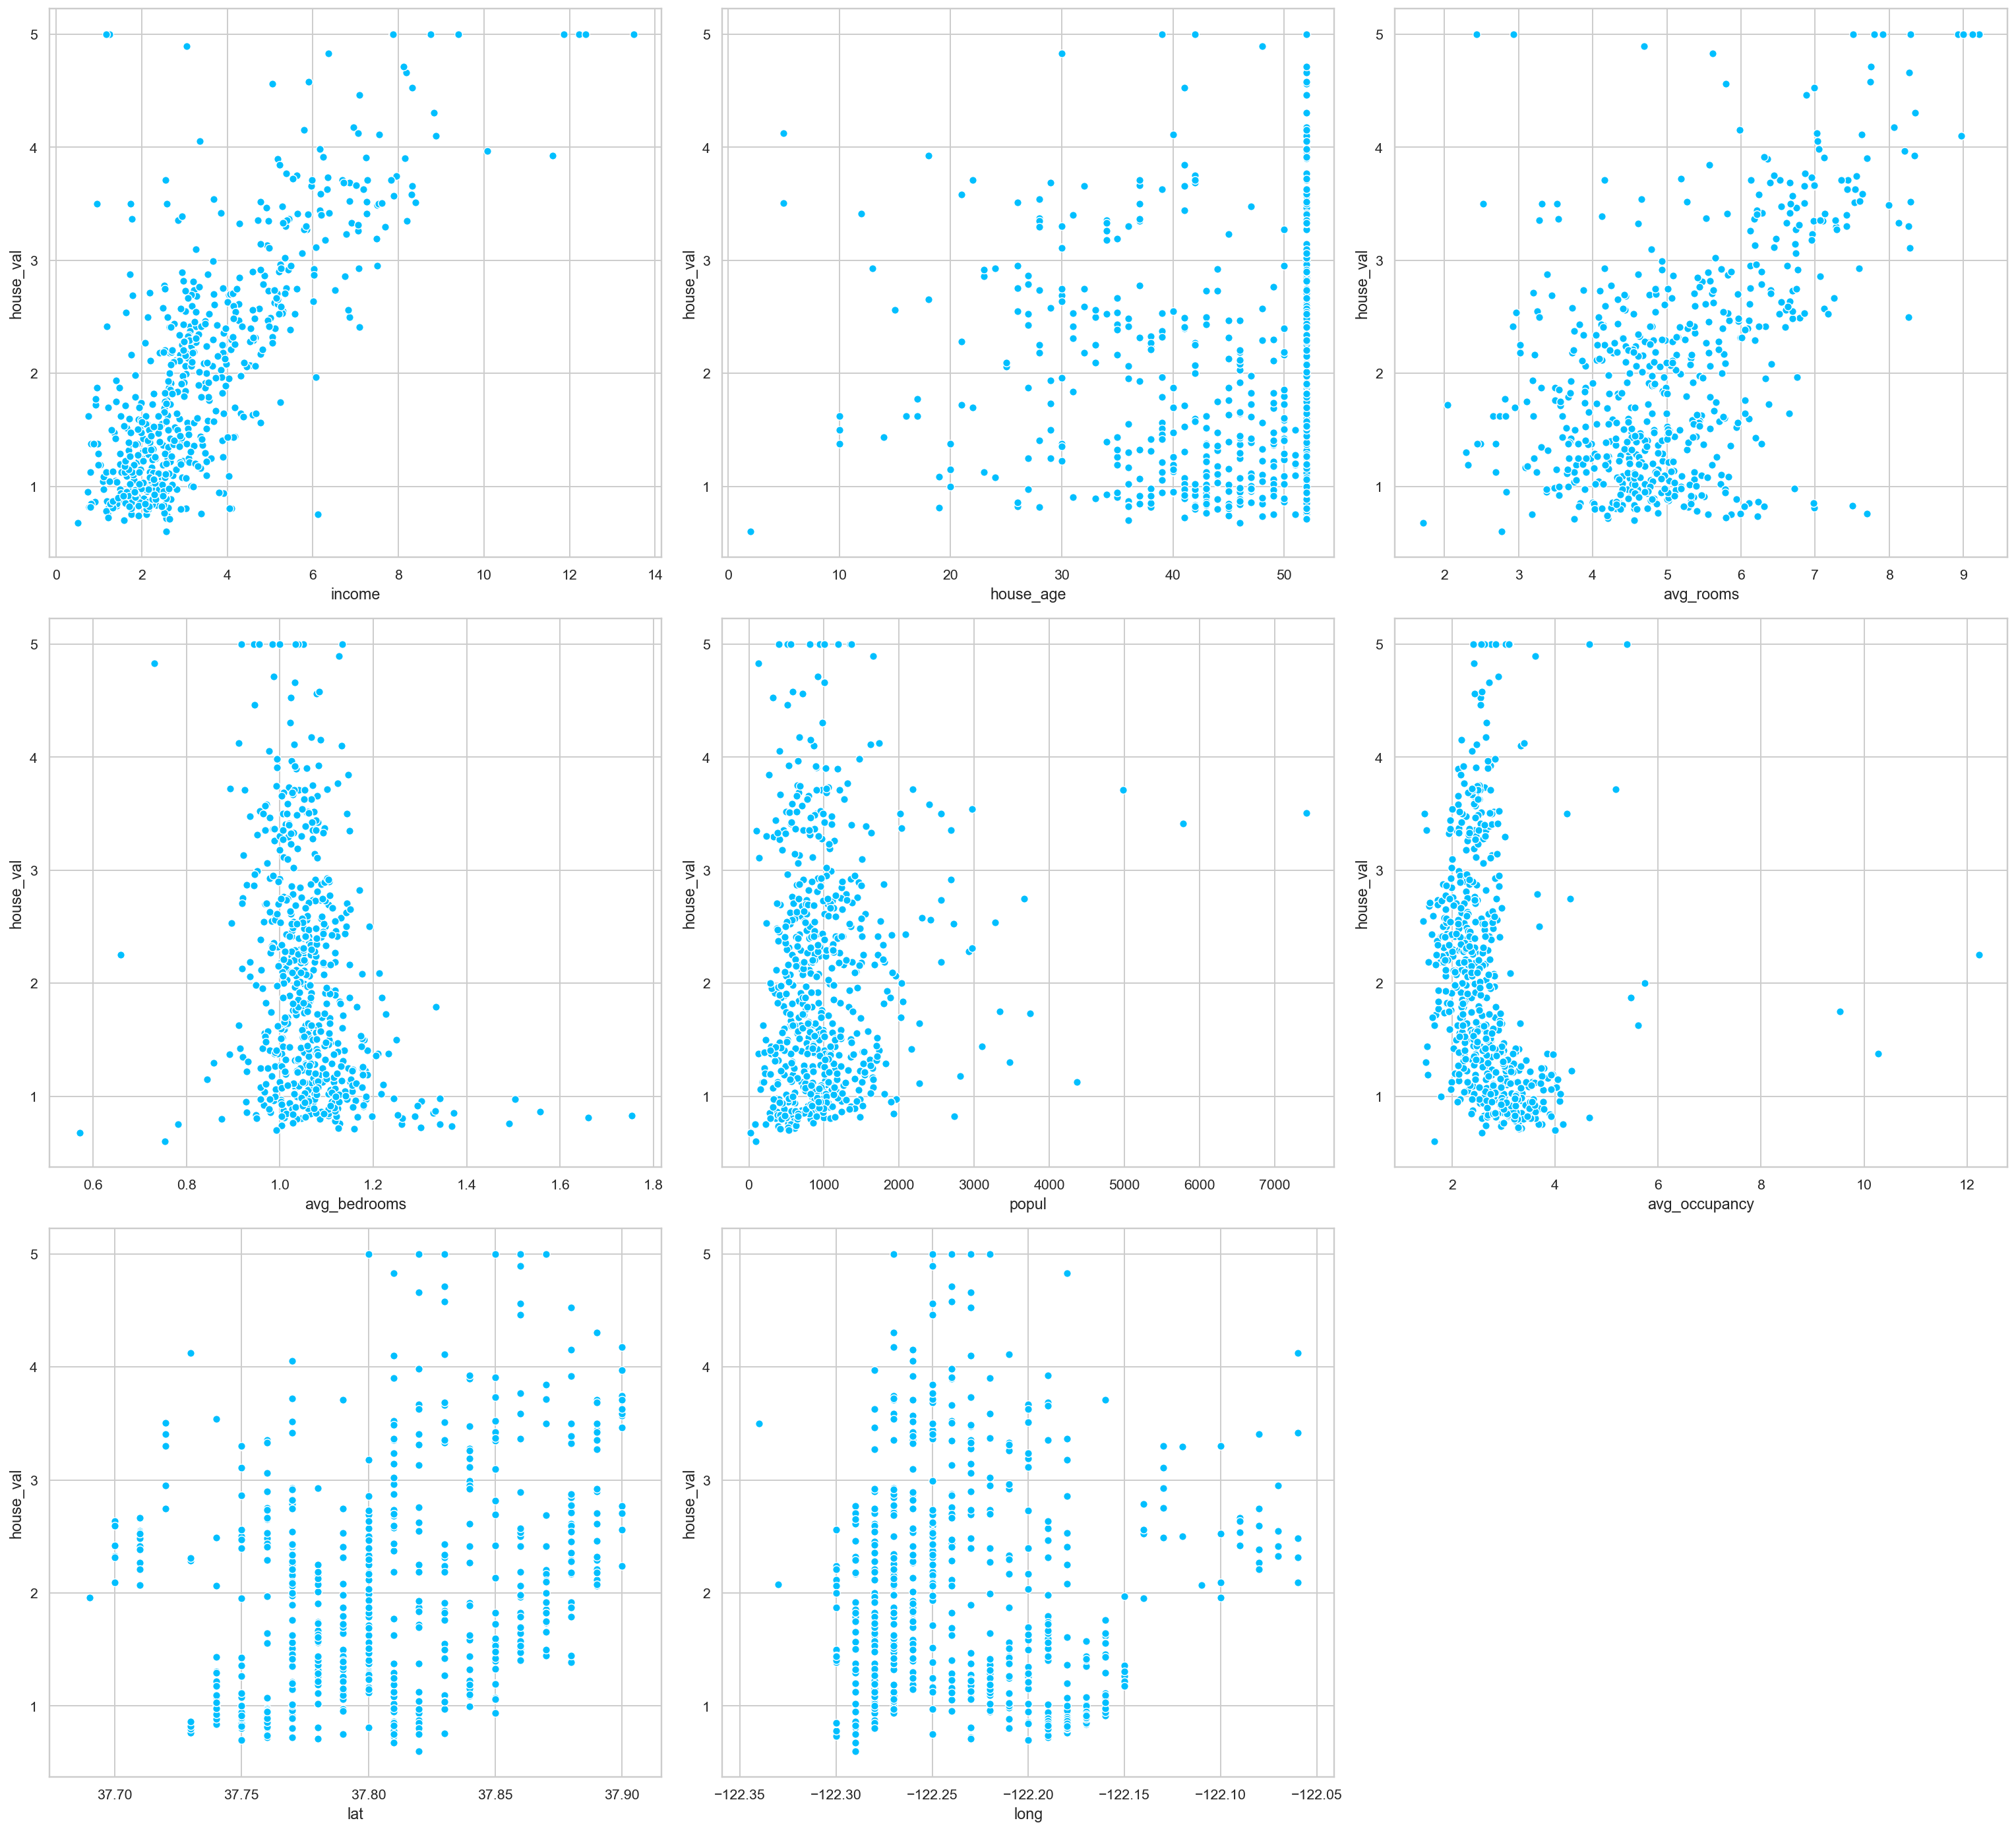

In [27]:
#scatter plot to visualize the realtions of all inputs with the target. have taken the first 500 rows for visualization
plt.figure(figsize=(22,20),dpi=140)
sns.set_context('talk',font_scale=1.4)
sns.set(style='whitegrid')
for i in range (0,8):
    plt.subplot(3,3,i+1)
    sns.scatterplot(x=calif[cl[i]].head(600),y=calif['house_val'].head(600),color='deepskyblue',legend='brief')
plt.tight_layout()

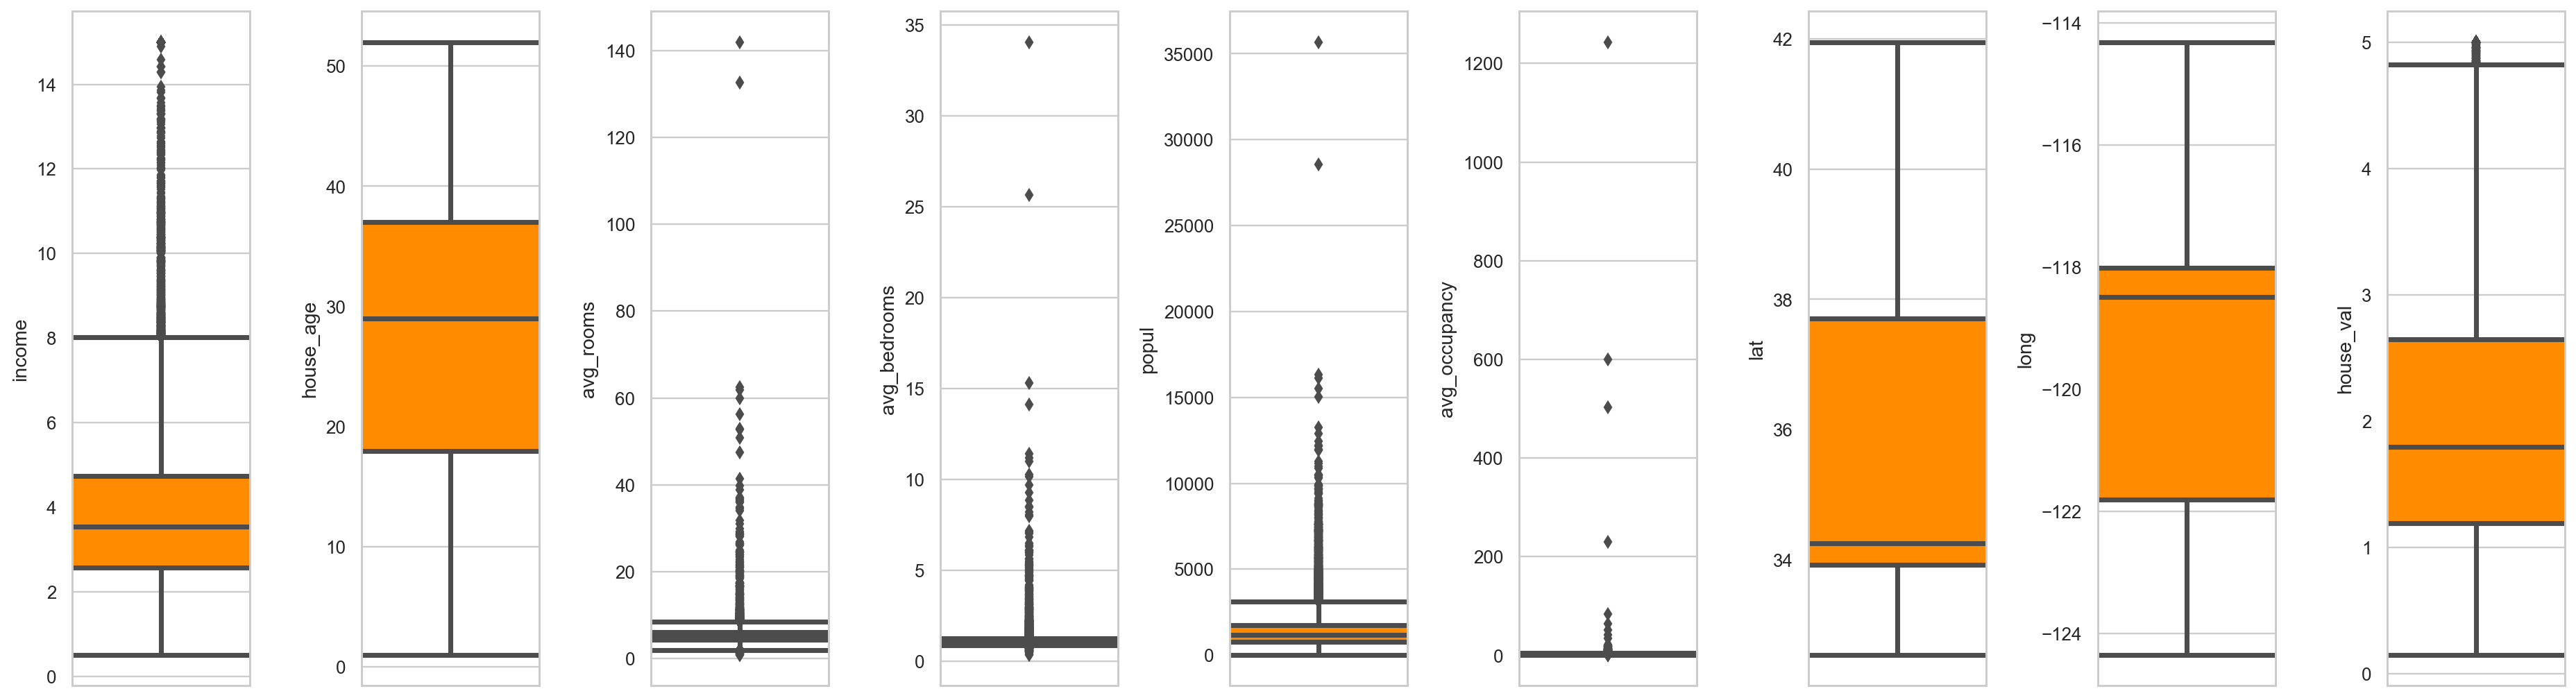

In [28]:
#boxplot
plt.figure(figsize=(22,12),dpi=170)
sns.set_context('talk',font_scale=1.4)
sns.set(style='whitegrid')
for i in range (0,9):
    plt.subplot(2,9,i+1)
    sns.boxplot(calif[cl[i]],orient='v',color='darkorange',saturation=15,width=2,linewidth=3)
plt.tight_layout()

In [29]:
z=np.abs(zscore(calif))
z

array([[2.34476576, 0.98214266, 0.62855945, ..., 1.05254828, 1.32783522,
        2.12963148],
       [2.33223796, 0.60701891, 0.32704136, ..., 1.04318455, 1.32284391,
        1.31415614],
       [1.7826994 , 1.85618152, 1.15562047, ..., 1.03850269, 1.33282653,
        1.25869341],
       ...,
       [1.14259331, 0.92485123, 0.09031802, ..., 1.77823747, 0.8237132 ,
        0.99274649],
       [1.05458292, 0.84539315, 0.04021111, ..., 1.77823747, 0.87362627,
        1.05860847],
       [0.78012947, 1.00430931, 0.07044252, ..., 1.75014627, 0.83369581,
        1.01787803]])

In [30]:
print(np.where(z>3))

(array([  131,   283,   409,   510,   511,   512,   514,   570,   576,
         710,   780,   799,   864,   865,   867,   869,   871,   922,
         923,   977,   985,   986,   995,  1010,  1021,  1024,  1024,
        1039,  1060,  1086,  1102,  1102,  1233,  1233,  1234,  1234,
        1235,  1235,  1238,  1238,  1239,  1239,  1240,  1240,  1541,
        1560,  1561,  1563,  1564,  1566,  1566,  1574,  1582,  1583,
        1586,  1591,  1593,  1602,  1617,  1621,  1636,  1637,  1642,
        1644,  1645,  1646,  1700,  1867,  1867,  1872,  1872,  1879,
        1889,  1889,  1910,  1910,  1911,  1911,  1912,  1912,  1913,
        1913,  1914,  1914,  1925,  1926,  1926,  1930,  1978,  1978,
        1979,  1979,  2025,  2119,  2213,  2294,  2311,  2392,  2392,
        2395,  2395,  2396,  2396,  2397,  2397,  2398,  2398,  2511,
        2511,  2776,  2826,  2963,  2969,  2975,  2978,  2999,  3004,
        3086,  3086,  3167,  3177,  3258,  3258,  3292,  3334,  3350,
        3350,  3364

In [31]:
print("few outlier values:\n",z[131][0],'\n',z[19006][4],'\n',z[18619][0])

few outlier values:
 4.0694430501296885 
 5.328804672844476 
 3.2772969013514452


In [32]:
#removing outliers
clf=calif[(z<3).all(axis=1)]

In [33]:
print('The shape before outlier removal:\t',calif.shape,'\nThe shape after outlier removal:\t',clf.shape,
      '\nSo a total of',len(calif)-len(clf),'rows has been removed')

The shape before outlier removal:	 (20640, 9) 
The shape after outlier removal:	 (19794, 9) 
So a total of 846 rows has been removed


In [34]:
ln=clf.columns.values

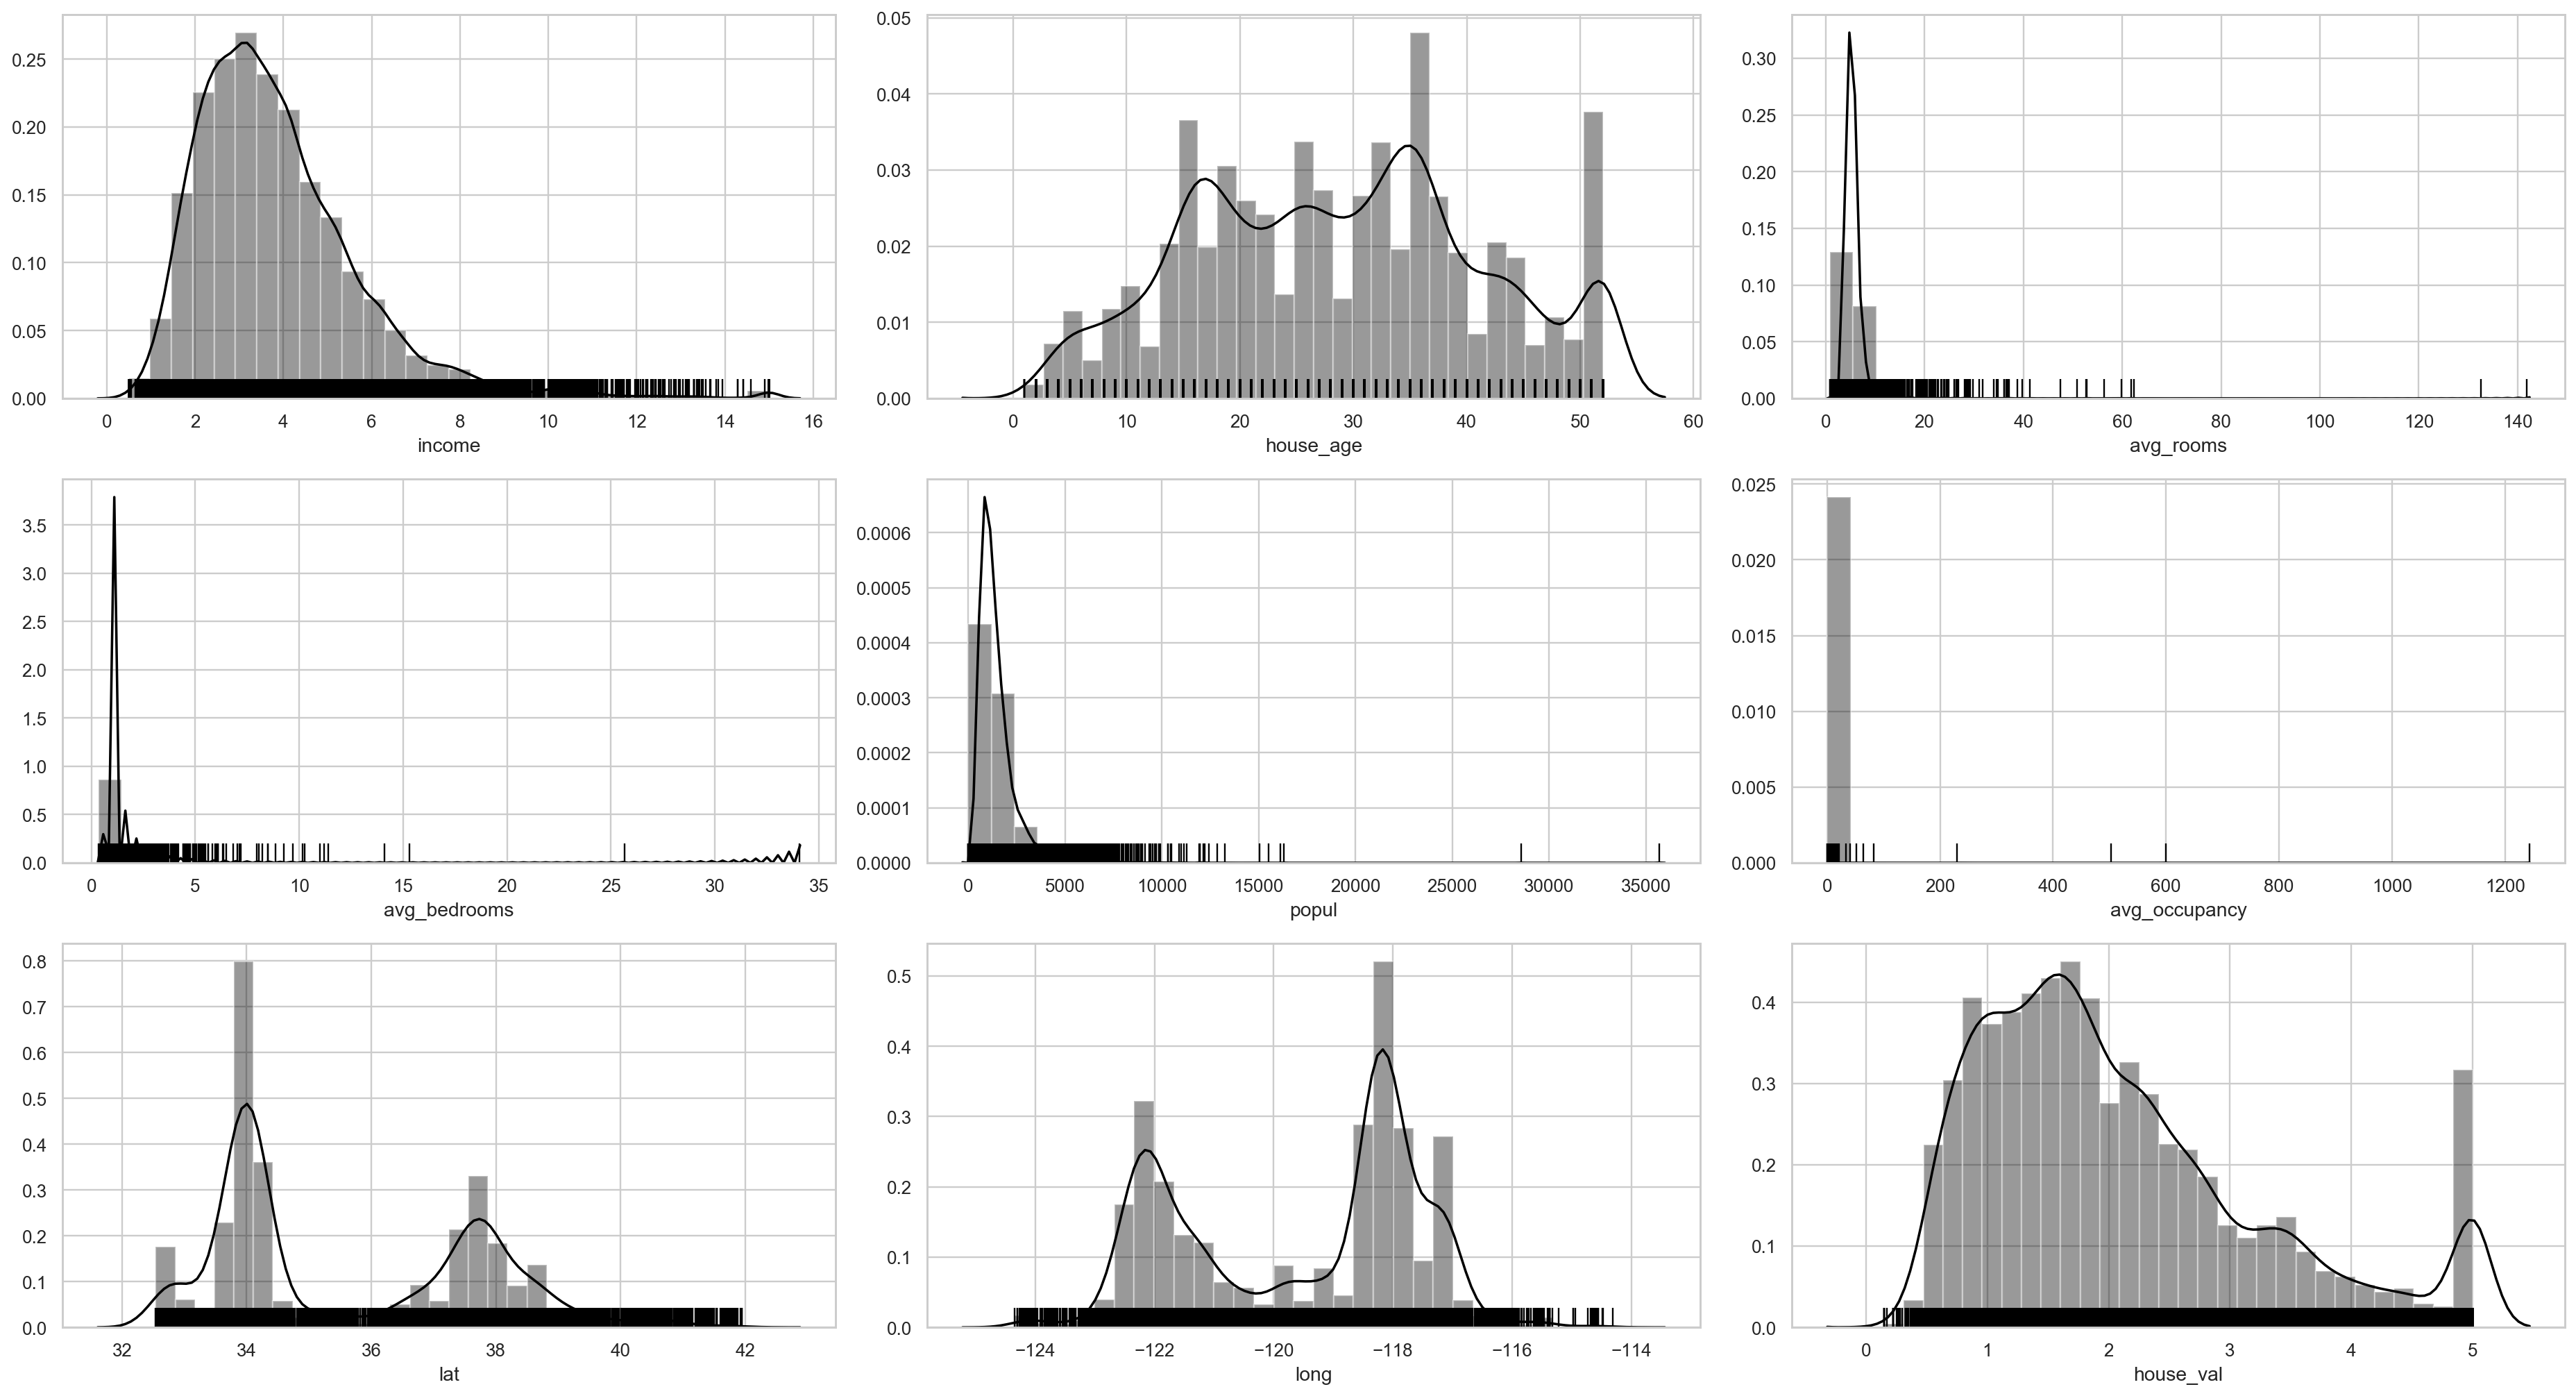

In [35]:
#distplot to visualize the spread
plt.figure(figsize=(22,12),dpi=170)
sns.set_context('talk',font_scale=1.4)
sns.set(style='whitegrid')
for i in range (0,9):
    plt.subplot(3,3,i+1)
    sns.distplot(calif[ln[i]],color='black',kde=True,rug=True,hist=True,bins=30)
plt.tight_layout()

In [36]:
#checking and removing skew()
clf.skew()

income           0.786048
house_age        0.046496
avg_rooms        0.555865
avg_bedrooms     3.913734
popul            1.346151
avg_occupancy    5.789707
lat              0.460162
long            -0.292814
house_val        0.970197
dtype: float64

In [37]:
for i in clf.columns:
    if clf.skew().loc[i]>0.55:
        clf[i]=np.log1p(clf[i])
print(clf.skew())

income          -0.046003
house_age        0.046496
avg_rooms       -0.303532
avg_bedrooms     2.880437
popul           -1.281355
avg_occupancy    0.801586
lat              0.460162
long            -0.292814
house_val        0.255509
dtype: float64


In [38]:
clf_corr=clf.corr()
clf_corr

,income,house_age,avg_rooms,avg_bedrooms,popul,avg_occupancy,lat,long,house_val
income,1.000000,-0.148224,0.618466,-0.199182,0.047587,-0.071554,-0.082585,-0.017052,0.660312
house_age,-0.148224,1.000000,-0.216619,-0.127887,-0.230496,-0.009066,0.007983,-0.101065,0.093791
avg_rooms,0.618466,-0.216619,1.000000,0.258263,-0.057141,-0.010635,0.145344,-0.088625,0.223665
avg_bedrooms,-0.199182,-0.127887,0.258263,1.000000,-0.063142,-0.111959,0.069654,0.009232,-0.115542
popul,0.047587,-0.230496,-0.057141,-0.063142,1.000000,0.192240,-0.122213,0.101605,0.014732
avg_occupancy,-0.071554,-0.009066,-0.010635,-0.111959,0.192240,1.000000,-0.150326,0.165551,-0.276632
lat,-0.082585,0.007983,0.145344,0.069654,-0.122213,-0.150326,1.000000,-0.927528,-0.177056
long,-0.017052,-0.101065,-0.088625,0.009232,0.101605,0.165551,-0.927528,1.000000,-0.032532
house_val,0.660312,0.093791,0.223665,-0.115542,0.014732,-0.276632,-0.177056,-0.032532,1.000000


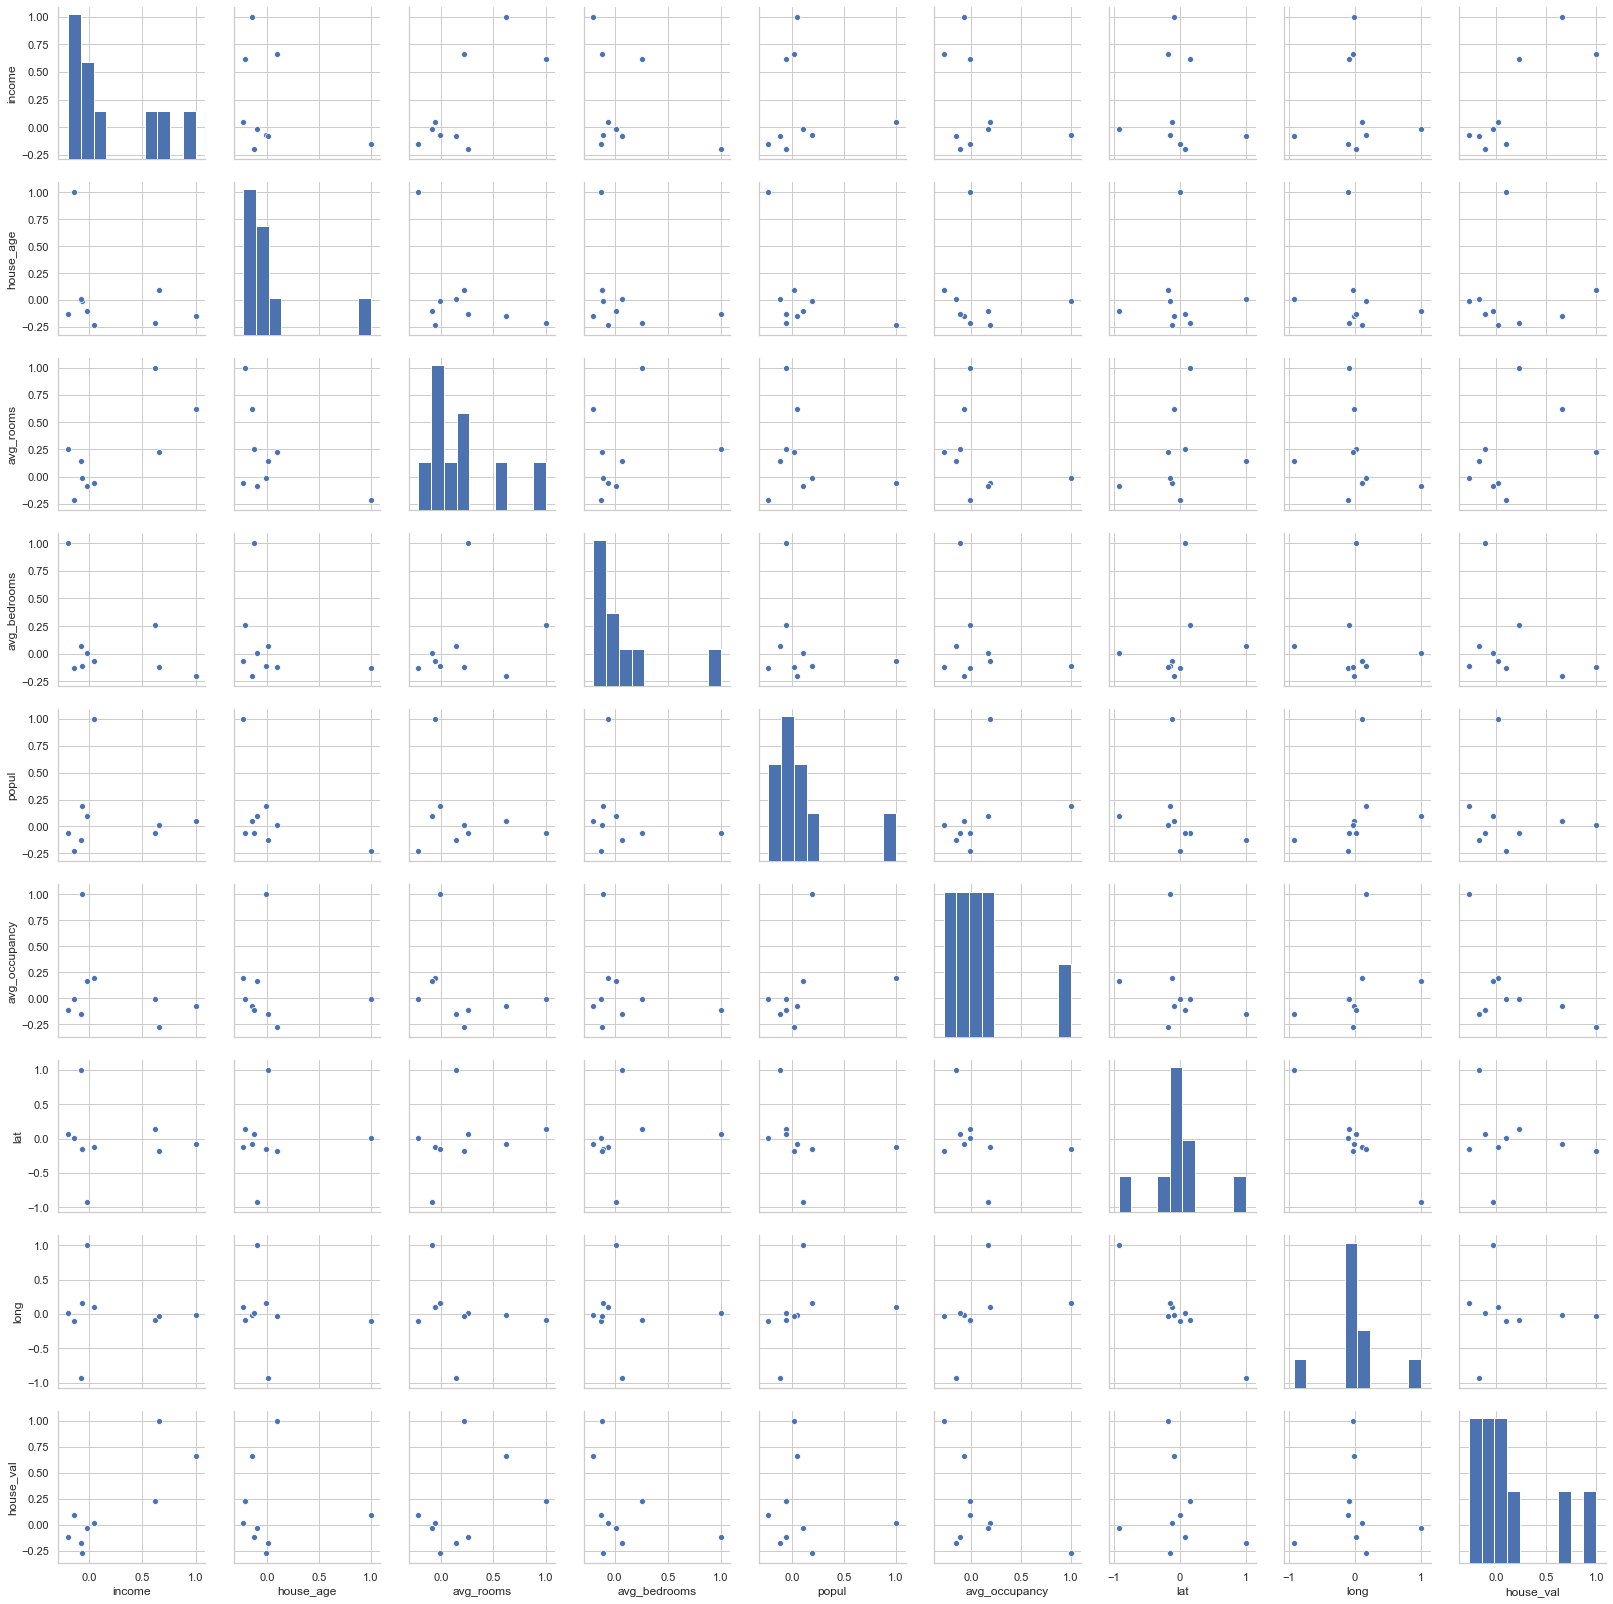

In [39]:
sns.pairplot(clf_corr)

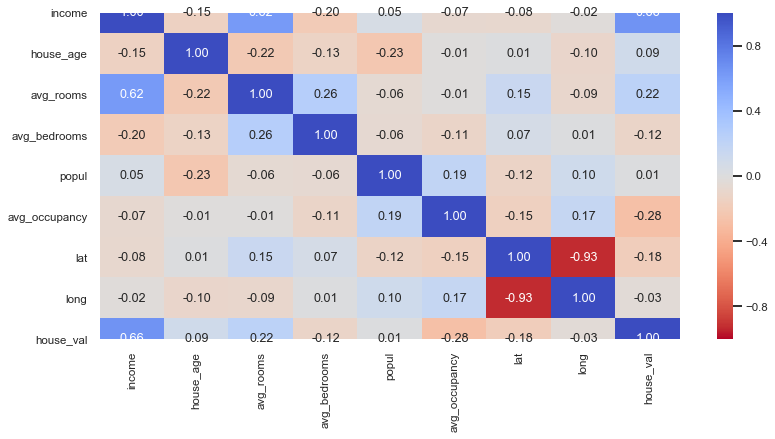

In [40]:
sns.set_context('talk',font_scale=0.7)
plt.figure(figsize=(13,6))
sns.heatmap(clf_corr,annot=True,vmax=1,vmin=-1,fmt=".2f",cmap='coolwarm_r')

In [41]:
from sklearn.preprocessing import StandardScaler #FOR STANDARD SCALING OF INPUTS

from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from timeit import default_timer as time

In [42]:
calif.head(3)

,income,house_age,avg_rooms,avg_bedrooms,popul,avg_occupancy,lat,long,house_val
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


In [43]:
x=calif.drop(['house_val'],axis=1)
y=calif['house_val']

In [44]:
x.head(4)

,income,house_age,avg_rooms,avg_bedrooms,popul,avg_occupancy,lat,long
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25


In [45]:
y.head(3)

0    4.526
1    3.585
2    3.521
Name: house_val, dtype: float64

In [46]:
ss=StandardScaler()
x=ss.fit_transform(x)

In [47]:
y=np.array(y)
y=y.reshape(-1,1)

In [48]:
print(' shape of x:',x.shape,'\n shape of y:',y.shape)

 shape of x: (20640, 8) 
 shape of y: (20640, 1)


# Holdout CV:

In [49]:
#generating testing and training data

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.34,random_state=83)

In [51]:
#checking the shape of testing and draining dataset
print('shape of x_train=',x_train.shape,'\nshape of y_train= ',y_train.shape,'\nshape of x_test= ',x_test.shape,'\nshape of y_test= ',y_test.shape)

shape of x_train= (13622, 8) 
shape of y_train=  (13622, 1) 
shape of x_test=  (7018, 8) 
shape of y_test=  (7018, 1)


In [52]:
#fitting the model and predicting the test data
st_hofit=time()
ln=LinearRegression()
ln.fit(x_train,y_train)
pred=ln.predict(x_test)
end_hofit=time()
hofit_time=(end_hofit-st_hofit)
print(hofit_time,'Sec')

0.010776700000008077 Sec


In [53]:
#Generating performance parameters and counting the time
st_ho_para=time()
r2=r2_score(y_test,pred)
MAE= mean_absolute_error(y_test,pred)
MSE= mean_squared_error(y_test,pred)
RMSE=np.sqrt(MSE)
NRMSE=-1*RMSE
NMSE=-1*MSE
end_ho_para=time()
exho=end_ho_para-st_ho_para
print(' R2SCORE=',r2,'\n MEAN ABS ERROR=',MAE,'\n MEAN SQ.ERR=',MSE,'\n ROOT MEAN SQ.ERR=',RMSE,'\n NEGTIVE ROOT MEAN SQ.ERROR=',NRMSE,
     '\nNEGATIVE MEAN SQ ERROR:',NMSE)

print('\nExecution time=',exho,'sec')

 R2SCORE= 0.5882500803471169 
 MEAN ABS ERROR= 0.5268372898246564 
 MEAN SQ.ERR= 0.5268263536350046 
 ROOT MEAN SQ.ERR= 0.7258280468781877 
 NEGTIVE ROOT MEAN SQ.ERROR= -0.7258280468781877 
NEGATIVE MEAN SQ ERROR: -0.5268263536350046

Execution time= 0.0029157999999824824 sec


# K-fold CrossValidation:

    In HoldoutCV method only a single set of training and testing pair is created and results are generated basing on that dataset.So the model may suffer from underfitting and over fitting so inorder to removed that problem and make the model ready for the real world the cross validation methos is used.
    In K-fold Cross Validation K represents a number which is 5 by default. It basically create 5 different pair of training and testing data and than generate the result which helps the model to produce a batter baised free results

In [54]:
#predicting and finding the test score and other parameters using k-fold and recording the time

In [55]:
st_cvp=time()
pred_kfold=cross_val_predict(ln,x,y,cv=30)
end_cvp=time()
ex_cvp=(end_cvp-st_cvp)

print('Execution time=',ex_cvp,'sec')

Execution time= 0.43800090000002 sec


In [56]:
#finding the parameters
st_cvpara=time()
cv_nmse=cross_val_score(ln,x,y,cv=30,scoring="neg_mean_squared_error")
cv_r2=cross_val_score(ln,x,y,cv=30,scoring="r2")
end_cvpara=time()
cv_time=end_cvpara-st_cvpara
print("time taken for finding parameters using k fold crossval=", cv_time,'sec')
print('\nNegative Mean SqEr=',cv_nmse.mean())
print('\nr2 score=',cv_r2.mean())

time taken for finding parameters using k fold crossval= 0.9028391999999883 sec

Negative Mean SqEr= -0.5421275241541584

r2 score= 0.3005614442040548


# LOOCV: LEAVE ONE OUT CROSS VALIDATION

In [57]:
#predicting the test data
st_loo=time()
pred_kfold=cross_val_predict(ln,x,y,cv=len(x))
end_loo=time()
elapsed_loo=(end_loo-st_loo)
print('Execution time=',elapsed_loo,'sec')

Execution time= 288.7957973 sec


In [58]:
#finding the parameters
st_loopara=time()
loo_nmse=cross_val_score(ln,x,y,cv=30,scoring="neg_mean_squared_error")
loo_r2=cross_val_score(ln,x,y,cv=30,scoring="r2")
end_loopara=time()
loo_time=end_loopara-st_loopara
print("time taken for finding parameters using k fold crossval=", (end_loopara-st_loopara),'sec')
print('\nNegative Mean SqEr=',loo_nmse.mean())
print('\nr2 score=',loo_r2.mean())

time taken for finding parameters using k fold crossval= 0.9660498999999731 sec

Negative Mean SqEr= -0.5421275241541584

r2 score= 0.3005614442040548


RESULTS COMPARISION

PUTTING ALL THE VALUES AND TIME TAKEN BY THESE CROSS VALIDATION METHOD IN A SINGLE DATAFRAME FOR BATTER COMPARISION

In [59]:
cv=[['HOLD_OUT',hofit_time,exho,r2.mean(),NMSE.mean()],
    ['K-FOLD',ex_cvp,cv_time,cv_r2.mean(),cv_nmse.mean()],
    ['LOO',elapsed_loo,loo_time,loo_r2.mean(),loo_nmse.mean()]]
validation=pd.DataFrame(cv,columns=['CV METHOD','TIME ELAPSED TO PREDICT','TIME ELAPSED TO FIND PARAMETERS','R2','NMSE'])
validation.style.set_properties(**{'background-color':'dimgrey','color':'lime','border-color': 'navy'})

,CV METHOD,TIME ELAPSED TO PREDICT,TIME ELAPSED TO FIND PARAMETERS,R2,NMSE
0,HOLD_OUT,0.0107767,0.0029158,0.58825,-0.526826
1,K-FOLD,0.438001,0.902839,0.300561,-0.542128
2,LOO,288.796,0.96605,0.300561,-0.542128
